<a href="https://colab.research.google.com/github/tienhuynh96/ML_demo/blob/main/Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Machine learning for Classification
- KNN
- Decision Tree
- Random Forest
- XGboost
- SVM

# 1.Get data

In [ ]:
# https://drive.google.com/file/d/1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6/view?usp=drive_link
!gdown --id 1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T4oy9neutVe2egrEcnjhKwAdHJCyDcJ6
To: /content/breast-cancer.csv
100% 24.4k/24.4k [00:00<00:00, 34.9MB/s]


# 2.Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import SVM support vector machine
from sklearn.svm import SVC
# Import XGB
import xgboost as xgb
# Import RandomForestClassifier class từ Sklearn
from sklearn.ensemble import RandomForestClassifier
# Import Decision Tree Class
from sklearn.tree import DecisionTreeClassifier
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import (
    StandardScaler,             # Using for Scaler
    LabelEncoder,               # Encoder for Lable
    OneHotEncoder,              # OneHot Encoder
    OrdinalEncoder              # Ordinal Encoder
)

from sklearn.compose import ColumnTransformer   # Build transform of both one hot and ordinal encoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Save accuracy of each model to scores
scores =[]

# Check
# Save accuracy of each model to dic_scores
dic_scores ={}

# 3.Load Dataset

In [ ]:
dataset_path = './breast-cancer.csv'
df = pd.read_csv(
    dataset_path,
    names=[
        'age',
        'meonpause',
        'tumor-size',
        'inv-nodes',
        'node-caps',
        'deg-malig',
        'breast',
        'breast-quad',
        'irradiat',
        'label'
    ]
)
df

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   meonpause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   label        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [ ]:
df.describe()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


# 4.Preprocess dataset

## 4.1 Fill missing value





In [ ]:
df['node-caps'] = df['node-caps'].fillna(df['node-caps'].mode()[0])
df['breast-quad'] = df['breast-quad'].fillna(df['breast-quad'].mode()[0])

In [ ]:
df.describe()

,age,meonpause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,230,130,152,111,218,201


## 4.2 Encode categorical features

In [ ]:
# Print unique value
for col_name in df.columns:
    n_uniques = df[col_name].unique()
    print(f'Unique values in {col_name}: {n_uniques}')

Unique values in age: ["'40-49'" "'50-59'" "'60-69'" "'30-39'" "'70-79'" "'20-29'"]
Unique values in meonpause: ["'premeno'" "'ge40'" "'lt40'"]
Unique values in tumor-size: ["'15-19'" "'35-39'" "'30-34'" "'25-29'" "'40-44'" "'10-14'" "'0-4'"
 "'20-24'" "'45-49'" "'50-54'" "'5-9'"]
Unique values in inv-nodes: ["'0-2'" "'3-5'" "'15-17'" "'6-8'" "'9-11'" "'24-26'" "'12-14'"]
Unique values in node-caps: ["'yes'" "'no'"]
Unique values in deg-malig: ["'3'" "'1'" "'2'"]
Unique values in breast: ["'right'" "'left'"]
Unique values in breast-quad: ["'left_up'" "'central'" "'left_low'" "'right_up'" "'right_low'"]
Unique values in irradiat: ["'no'" "'yes'"]
Unique values in label: ["'recurrence-events'" "'no-recurrence-events'"]


In [ ]:
# list of categorical features
non_rank_features = ['meonpause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
# list of rank features
rank_features = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

y = df['label']
X = df.drop('label', axis=1)

In [ ]:
# Applies different transformations to different columns in X Using ColumnTransformer

# Cach 1
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer.get_feature_names_out
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
# The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list.

transformer = ColumnTransformer(
    transformers=[
        ("OneHot", OneHotEncoder(drop='first'), non_rank_features),  # OneHotEncoder for non rank features
        ("Ordinal", OrdinalEncoder(), rank_features)                 # OrdinalEncoder for rank features
    ],
    remainder='passthrough'             # Feature which is not specify, => remain unchange => put the position to the right after finish transfomrer
)

# Transformer for dataframe X
X_transformed = transformer.fit_transform(X)

# Get the features of non rank features after one hot feature
onehot_features = transformer.named_transformers_['OneHot'].get_feature_names_out(non_rank_features)
# Set feature of new dataframe: in order: features of one hot + features of Ordinal + Features of unchange
all_features = onehot_features.tolist() + rank_features

# Set new datafame with data is X_Transformed and columns is all_features which has set above
X_encoded = pd.DataFrame(
    X_transformed,
    columns=all_features
)

In [ ]:
X_encoded

,meonpause_'lt40',meonpause_'premeno',node-caps_'yes',breast_'right',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up',irradiat_'yes',age,tumor-size,inv-nodes,deg-malig
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0
282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,1.0
283,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,1.0
284,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0


In [ ]:
# Applies different transformations to different columns in X Using ColumnTransformer


# Cach 2  # Trong Update 10/2022 - sklearn version 1.2.dev0
# Check version của sklearn truoc khi chay

# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer.get_feature_names_out
# https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
# The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list.

transformer = ColumnTransformer(
    transformers=[
        ("OneHot", OneHotEncoder(drop='first'), non_rank_features),  # OneHotEncoder for non rank features
        ("Ordinal", OrdinalEncoder(), rank_features)                 # OrdinalEncoder for rank features
    ],
    remainder='passthrough'             # Feature which is not specify, => remain unchange => put the position to the right after finish transfomrer
)

# The ColumnTransformer (and other transformers as well) now exposes a .set_output() method
# which gives the possibility to configure a transformer to output pandas DataFrames, by passing parameter transform='pandas' to it.
transformer.set_output(transform='pandas')

# Transformer for dataframe X
X_encoded = transformer.fit_transform(X)


ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").

In [ ]:
X_encoded

,meonpause_'lt40',meonpause_'premeno',node-caps_'yes',breast_'right',breast-quad_'left_low',breast-quad_'left_up',breast-quad_'right_low',breast-quad_'right_up',irradiat_'yes',age,tumor-size,inv-nodes,deg-malig
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0
282,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,1.0
283,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,1.0
284,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0


## 4.3 Encode Lable

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## 4.4 Normalization

In [ ]:
normalizer = StandardScaler()
X_normalized = normalizer.fit_transform(X_encoded)

# 5.Train test split

In [ ]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X_normalized, y_encoded,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [ ]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')

Number of training samples: 200
Number of val samples: 86


# 6.Model and Training

## 6.1 SVM

### Model and Train

In [ ]:
svm_c = SVC(
    random_state=random_state
)
svm_c.fit(X_train, y_train)

SVC(random_state=1)

### Evaluation

In [ ]:
y_pred_svm = svm_c.predict(X_val)
svm_scores = accuracy_score(y_pred_svm, y_val)

scores.append({"SVM": svm_scores})
print('Evaluation results on validation set:')
print(f'Accuracy svm: {svm_scores}')

dic_scores['SVM'] =svm_scores

Evaluation results on validation set:
Accuracy svm: 0.686046511627907


In [ ]:
dic_scores

{'SVM': 0.686046511627907}

## 6.2 XGBOOST

### Model and Train

In [ ]:
xg_class = xgb.XGBClassifier(seed=7)
xg_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [ ]:
y_pred_xgb = xg_class.predict(X_val)
xgb_scores = accuracy_score(y_pred_xgb, y_val)

scores.append({"XGB": xgb_scores})
print('Evaluation results on validation set:')
print(f'Accuracy xgboost: {xgb_scores}')

dic_scores['XGB'] =xgb_scores

Evaluation results on validation set:
Accuracy xgboost: 0.6395348837209303


## 6.3 Random Forest

In [ ]:
rd = RandomForestClassifier()
rd.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rd = xg_class.predict(X_val)
rd_scores = accuracy_score(y_pred_rd, y_val)

scores.append({"Random Forest": rd_scores})
print('Evaluation results on validation set:')
print(f'Accuracy random forest: {rd_scores}')

dic_scores['Random Forest'] =rd_scores

Evaluation results on validation set:
Accuracy random forest: 0.6395348837209303


## 6.4 Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [ ]:
y_pred_dt = dt_classifier.predict(X_val)
dt_scores = accuracy_score(y_pred_dt, y_val)

scores.append({"Decision Tree": dt_scores})
print('Evaluation results on validation set:')
print(f'Accuracy Decision Tree: {dt_scores}')

dic_scores['"Decision Tree'] =dt_scores

Evaluation results on validation set:
Accuracy Decision Tree: 0.686046511627907


## 6.5 KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_classifier.predict(X_val)
knn_scores = accuracy_score(y_pred_knn, y_val)

scores.append({"KNN": knn_scores})
print('Evaluation results on validation set:')
print(f'Accuracy KNN: {knn_scores}')

dic_scores['KNN'] =knn_scores

Evaluation results on validation set:
Accuracy KNN: 0.6395348837209303


# 7.Compare Score

In [ ]:
scores

[{'SVM': 0.686046511627907},
 {'XGB': 0.6395348837209303},
 {'Random Forest': 0.6395348837209303},
 {'Decision Tree': 0.686046511627907},
 {'KNN': 0.6395348837209303}]

In [ ]:
dic_scores

{'SVM': 0.686046511627907,
 'XGB': 0.6395348837209303,
 'Random Forest': 0.6395348837209303,
 '"Decision Tree': 0.686046511627907,
 'KNN': 0.6395348837209303}

In [ ]:
dic_scores.keys()

dict_keys(['SVM', 'XGB', 'Random Forest', '"Decision Tree', 'KNN'])

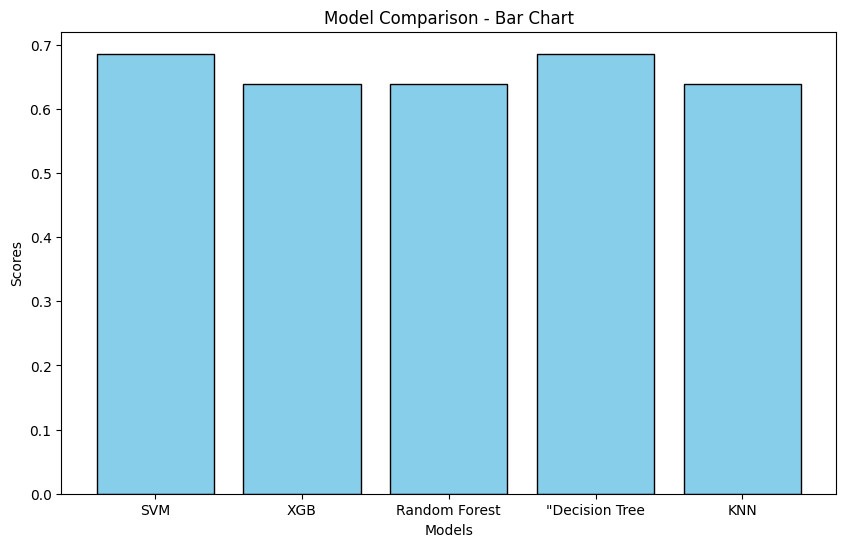

In [ ]:
# Extract model names and scores
model_names = list(dic_scores.keys())
model_scores = list(dic_scores.values())

# Plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(model_names, model_scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Bar Chart')


# Display the plot
plt.show()

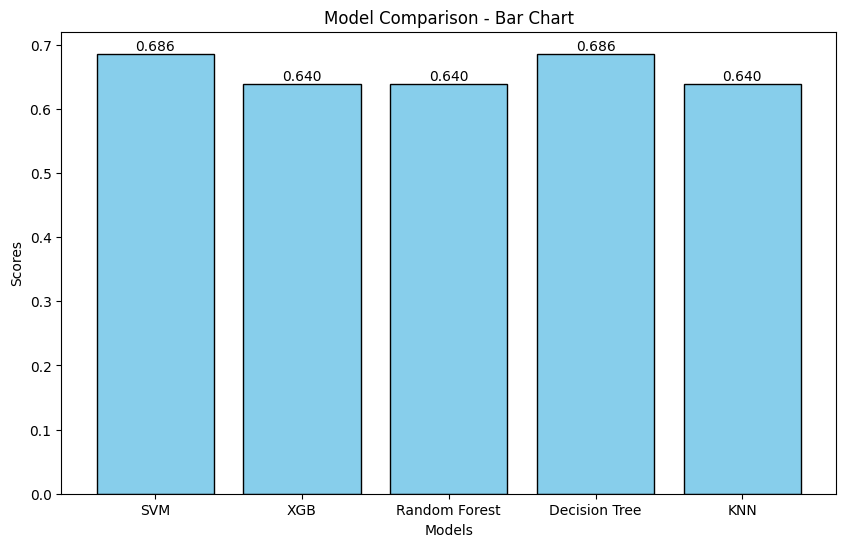

In [ ]:
# Extract model names and scores
model_names = [list(score.keys())[0] for score in scores]
model_scores = [list(score.values())[0] for score in scores]

# Plot
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(model_names, model_scores, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Bar Chart')


# Display the score value on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height,                             # Y-coordinate
        f'{height:.3f}',                    # Format the value to 3 decimal places
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )

# Display the plot
plt.show()